In [1]:
from langchain_core.messages import HumanMessage
print("HumanMessage imported successfully!")

HumanMessage imported successfully!


In [2]:
pip install mediapipe

  Using cached sounddevice-0.5.1-py3-none-win_amd64.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/51.0 MB ? eta -:--:--
   -- ------------------------------------- 2.6/51.0 MB 12.5 MB/s eta 0:00:04
   ---- ----------------------------------- 5.2/51.0 MB 12.7 MB/s eta 0:00:04
   ------ --------------------------------- 7.9/51.0 MB 12.5 MB/s eta 0:00:04
   -------- ------------------------------- 10.5/51.0 MB 12.3 MB/s eta 0:00:04
   ---------- ----------------------------- 13.1/51.0 MB 12.4 MB/s eta 0:00:04
   ------------ --------------------------- 15.7/51.0 MB 12.4 MB/s eta 0:00:03
   -------------- ------------------------- 18.4/51.0 MB 12.3 MB/s eta 0:00:03
   ---------------- ----------------------- 21.0/51.0 MB 12.4 MB/s eta 0:00:03
   ------------------ --------------------- 23.6/51.0 MB 12.3 MB/s eta 0:00:03
   -------------------- ------------------- 26.2/51.0 MB 12.3 MB/s eta 0:00:03
   ---------------------- ----------------- 28.8/51.0 MB 12.4 MB/s et

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sarak\\02_new_code\\05_tut_proj\\03_pytorch\\pytorch_env\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [1]:
import cv2
from cvzone.HandTrackingModule import HandDetector

cap = cv2.VideoCapture(0)  # Open webcam
detector = HandDetector(detectionCon=0.8)  # Initialize hand detector

while True:
    success, img = cap.read()
    hands, img = detector.findHands(img)  # Detect hands
    
    if hands:
        print("Hand detected!")

    cv2.imshow("Hand Tracking", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detected!
Hand detec

In [9]:
from ultralytics import YOLO
import cv2

# Load pre-trained YOLOv8 model (no training needed)
model = YOLO('yolov8n.pt')  # Can use yolov8s/m/l/x for better accuracy

# Detect heads (using COCO class 0: person - we'll filter for head area)
img = cv2.imread('head1.jpeg')
results = model(img, classes=[0])  # Detect only people
print(results)
# Filter for head area (approximate head as top 30% of person box)
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    head_h = int((y2 - y1) * 0.3)  # Head height = 30% of body
    cv2.rectangle(img, (x1, y1), (x2, y1 + head_h), (0,255,0), 2)

cv2.imshow('Heads', img)
cv2.waitKey(0)


0: 480x640 12 persons, 28.7ms
Speed: 4.0ms preprocess, 28.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange',

-1

In [10]:
import torchvision
import cv2

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

img = cv2.imread('head1.jpeg')
tensor_img = torchvision.transforms.functional.to_tensor(img)
outputs = model([tensor_img])[0]
print(outputs)

# Filter person detections (class 1 in COCO) and get head area
for box, score in zip(outputs['boxes'], outputs['scores']):
    if score > 0.8:  # Confidence threshold
        x1, y1, x2, y2 = map(int, box)
        head_h = int((y2 - y1) * 0.3)
        cv2.rectangle(img, (x1, y1), (x2, y1 + head_h), (0,0,255), 2)

cv2.imshow('Heads', img)
cv2.waitKey(0)

{'boxes': tensor([[ 47.5484,  72.0139, 109.2171, 146.5315],
        [129.0816,  15.6898, 207.6311, 146.9946],
        [ 98.0225,  29.5671, 151.4621, 147.1083],
        [  1.9267,  14.8481,  97.2917, 133.8414],
        [136.1093,  11.5636, 173.4140,  85.8095],
        [148.5930,  61.0139, 207.9173, 146.5063],
        [ 61.9976,  48.3681, 189.2925, 145.1400],
        [ 38.5497,  37.9533, 142.7352, 145.4491],
        [105.4769,  78.5404, 159.9935, 146.9484],
        [ 36.5258,  14.8417, 106.0712,  81.2283],
        [ 97.5733,  38.3597, 141.5835, 110.2120],
        [ 38.0256,  84.0882,  75.7801, 146.4964],
        [ 85.7433,  68.4312, 142.0185, 146.8502],
        [ 11.5464,  62.8223,  71.3097, 144.1747],
        [127.8611, 127.0808, 137.1001, 147.6474],
        [  6.4810, 126.7487,  34.6540, 147.3252],
        [138.6241,  13.5959, 196.9169,  98.8673],
        [ 45.8505,  85.7727,  71.8093, 115.3984],
        [  4.9023,  10.8914, 128.3655,  87.2329],
        [161.6305, 125.1797, 199.1211, 1

-1

In [8]:
import cv2

# Pre-trained Haar cascade for frontal faces (works for some head detections)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img = cv2.imread('head1.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)

cv2.imshow('Heads', img)
cv2.waitKey(0)

-1

In [5]:
import os
import torchvision
import cv2

image_path = 'head1.jpeg'

# Check if file exists
if not os.path.exists(image_path):
    print(f"Error: Image file '{image_path}' not found")
    print(f"Current working directory: {os.getcwd()}")
else:
    # Load the image
    img = cv2.imread(image_path)
    
    # Check if image loaded successfully
    if img is None:
        print(f"Error: Could not load image at '{image_path}'")
    else:
        # Convert BGR (OpenCV format) to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Convert to tensor
        tensor_img = torchvision.transforms.functional.to_tensor(img)
        
        # Load and evaluate model
        model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
        model.eval()
        
        # Get predictions
        outputs = model([tensor_img])[0]
        print(outputs)
        print(outputs.keys())
        
        # Filter person detections (class 1 in COCO) and get head area
        for box, score in zip(outputs['boxes'], outputs['scores']):
            if score > 0.8:  # Confidence threshold
                x1, y1, x2, y2 = map(int, box)
                head_h = int((y2 - y1) * 0.3)
                cv2.rectangle(img, (x1, y1), (x2, y1 + head_h), (0,0,255), 2)
        
        # Show result
        cv2.imshow('Heads', img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

{'boxes': tensor([[  1.2812,  52.8637,  69.9525, 142.1439],
        [104.2784,  84.9662, 164.4073, 146.4351],
        [ 54.2811,  74.8138, 113.2527, 146.6205],
        [145.7629,  61.7392, 208.8939, 144.7774],
        [ 96.9744,  42.1206, 139.6143, 102.0219],
        [  5.2097,  13.2859, 100.0168,  82.2260],
        [101.9423,   7.2020, 136.8085,  52.2738],
        [128.0836, 128.6490, 136.5400, 146.6914],
        [134.6377,  10.5808, 174.1519,  83.3261],
        [132.9541,  12.0476, 204.6390, 138.9247],
        [ 47.7516,  13.2239,  94.6912,  75.6076],
        [ 77.5134,  44.3010, 104.3980,  75.1022],
        [162.0629, 125.3422, 199.1735, 147.4784],
        [  1.0814,  75.4851,  21.1160,  96.5023],
        [ 55.9692,  30.5295, 104.0163,  81.9239],
        [ 44.7936,  84.7576,  79.2795, 146.7427],
        [117.6282,  70.0019, 181.9849, 148.0000],
        [ 98.4016,  15.9557, 137.7914,  79.4375],
        [ 86.0999,  30.6555, 108.1860,  56.0103],
        [  3.5845,  25.5603,  69.2453,  

In [1]:
import cv2
import torchvision
import os

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

video_path = 'people2.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file '{video_path}'")
    exit()

frame_count = 0
process_every_n_frames = 3  # Process every 3rd frame

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
        
    frame_count += 1
    # Skip frames to improve performance
    if frame_count % process_every_n_frames != 0:
        cv2.imshow('Heads Detection', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        continue
    
    # Resize frame for faster processing (optional)
    frame = cv2.resize(frame, (640, 480))
    
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    tensor_frame = torchvision.transforms.functional.to_tensor(rgb_frame)
    
    outputs = model([tensor_frame])[0]
    
    for box, score in zip(outputs['boxes'], outputs['scores']):
        if score > 0.8:
            x1, y1, x2, y2 = map(int, box)
            head_h = int((y2 - y1) * 0.3)
            cv2.rectangle(frame, (x1, y1), (x2, y1 + head_h), (0, 0, 255), 2)
    
    cv2.imshow('Heads Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\sarak\02_new_code\05_tut_proj\03_pytorch\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\sarak\02_new_code\05_tut_proj\03_pytorch\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
import cv2
import torchvision
import os
import torch
from torchvision.transforms import functional as F

# Load the Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Video input and output paths
video_path = 'people2.mp4'
output_video_path = 'output_head_detection.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file '{video_path}'")
    raise SystemExit

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object to save output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4
out = cv2.VideoWriter(output_video_path, fourcc, fps, (640, 480))  # Output size matches resized frame

frame_count = 0
process_every_n_frames = 3  # Process every 3rd frame for speed

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video reached.")
        break
        
    frame_count += 1
    
    # Skip frames to improve performance
    if frame_count % process_every_n_frames != 0:
        # Write unprocessed frame to output video
        frame_resized = cv2.resize(frame, (640, 480))
        out.write(frame_resized)
        continue
    
    # Resize frame for faster processing
    frame = cv2.resize(frame, (640, 480))
    
    # Convert BGR (OpenCV) to RGB (PyTorch expects RGB)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    tensor_frame = F.to_tensor(rgb_frame)  # Convert to tensor
    
    # Run detection (ensure model is on CPU or GPU if available)
    with torch.no_grad():  # No need to compute gradients
        outputs = model([tensor_frame])[0]
    
    # Process detections
    for box, score in zip(outputs['boxes'], outputs['scores']):
        if score > 0.8:  # Confidence threshold
            x1, y1, x2, y2 = map(int, box)
            head_h = int((y2 - y1) * 0.3)  # Top 30% as head
            cv2.rectangle(frame, (x1, y1), (x2, y1 + head_h), (0, 0, 255), 2)
    
    # Write the processed frame to the output video
    out.write(frame)
    
    # Optional: Save every 50th processed frame as an image for inspection
    if frame_count % 50 == 0:
        cv2.imwrite(f'frame_{frame_count}.jpg', frame)
        print(f"Saved frame_{frame_count}.jpg")

# Release resources
cap.release()
out.release()
print(f"Video processing complete. Output saved to '{output_video_path}'")

Saved frame_150.jpg
Saved frame_300.jpg
Saved frame_450.jpg
Saved frame_600.jpg
End of video reached.
Video processing complete. Output saved to 'output_head_detection.mp4'


In [4]:
import cv2

# Pre-trained Haar cascade for frontal faces (works for some head detections)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img = cv2.imread('head1.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)

cv2.imshow('Heads', img)
cv2.waitKey(0)

-1

In [11]:
import cv2
import torch
import torchvision
import time
from ultralytics import YOLO
from torchvision.transforms import functional as F

# Initialize models
fasterrcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True).eval()
yolo = YOLO('yolov8n.pt')  # Nano version for speed comparison

# Video setup
video_path = 'people2.mp4'
cap = cv2.VideoCapture(video_path)
frame_width, frame_height = int(cap.get(3)), int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

# Output videos
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out_frcnn = cv2.VideoWriter('output_fasterrcnn.mp4', fourcc, fps, (frame_width, frame_height))
out_yolo = cv2.VideoWriter('output_yolo.mp4', fourcc, fps, (frame_width, frame_height))

# Timing dictionaries
timings = {
    'fasterrcnn': {'frame_times': [], 'total_frames': 0},
    'yolo': {'frame_times': [], 'total_frames': 0}
}

process_every_n_frames = 3  # Process every 3rd frame

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Skip frames for performance
    if int(cap.get(cv2.CAP_PROP_POS_FRAMES)) % process_every_n_frames != 0:
        continue

    # ---------------------------
    # Faster R-CNN Processing
    # ---------------------------
    start_time = time.time()
    
    # Preprocess
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    tensor_frame = F.to_tensor(rgb_frame)
    
    # Inference
    with torch.no_grad():
        outputs = fasterrcnn([tensor_frame])[0]
    
    # Filter people and get heads (COCO class 1 = person)
    people_mask = (outputs['labels'] == 1) & (outputs['scores'] > 0.8)
    boxes = outputs['boxes'][people_mask]
    
    # Draw boxes
    frcnn_frame = frame.copy()
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)
        head_h = int((y2 - y1) * 0.3)
        cv2.rectangle(frcnn_frame, (x1, y1), (x2, y1 + head_h), (0, 0, 255), 2)
    
    # Record timing
    frcnn_time = time.time() - start_time
    timings['fasterrcnn']['frame_times'].append(frcnn_time)
    timings['fasterrcnn']['total_frames'] += 1
    
    # Add FPS text
    cv2.putText(frcnn_frame, f"FPS: {1/frcnn_time:.1f}", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    out_frcnn.write(frcnn_frame)

    # ---------------------------
    # YOLOv8 Processing
    # ---------------------------
    start_time = time.time()
    
    # Inference (classes=[0] for person in COCO)
    results = yolo(frame, classes=[0], verbose=False)
    
    # Draw boxes
    yolo_frame = frame.copy()
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        head_h = int((y2 - y1) * 0.3)
        cv2.rectangle(yolo_frame, (x1, y1), (x2, y1 + head_h), (0, 255, 0), 2)
    
    # Record timing
    yolo_time = time.time() - start_time
    timings['yolo']['frame_times'].append(yolo_time)
    timings['yolo']['total_frames'] += 1
    
    # Add FPS text
    cv2.putText(yolo_frame, f"FPS: {1/yolo_time:.1f}", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    out_yolo.write(yolo_frame)

    # Display comparison (side by side)
    combined = cv2.hconcat([frcnn_frame, yolo_frame])
    cv2.imshow('Comparison: Faster R-CNN (Left) vs YOLOv8 (Right)', combined)
    if cv2.waitKey(1) == ord('q'):
        break

# Release resources
cap.release()
out_frcnn.release()
out_yolo.release()
cv2.destroyAllWindows()

# ---------------------------
# Print Performance Summary
# ---------------------------
def print_stats(model_name):
    times = timings[model_name]['frame_times']
    avg_fps = 1 / (sum(times) / len(times))
    print(f"\n{model_name.upper()} Stats:")
    print(f"- Total Frames Processed: {len(times)}")
    print(f"- Average FPS: {avg_fps:.1f}")
    print(f"- Fastest Frame: {1/max(times):.1f} FPS")
    print(f"- Slowest Frame: {1/min(times):.1f} FPS")

print_stats('fasterrcnn')
print_stats('yolo')


FASTERRCNN Stats:
- Total Frames Processed: 48
- Average FPS: 0.7
- Fastest Frame: 0.5 FPS
- Slowest Frame: 0.7 FPS

YOLO Stats:
- Total Frames Processed: 48
- Average FPS: 26.9
- Fastest Frame: 3.9 FPS
- Slowest Frame: 33.3 FPS


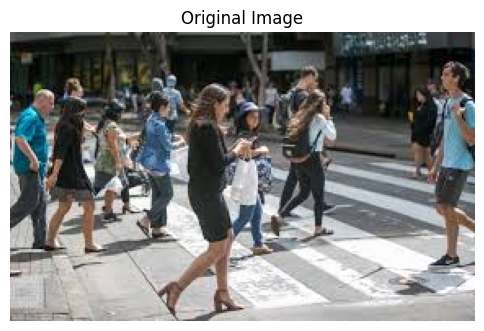

In [17]:
import cv2
import matplotlib.pyplot as plt

def load_image(path):
    """Load and convert image to RGB format"""
    image = cv2.imread(path)  # BGR format
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def show_image(image, title="Image"):
    """Display image with matplotlib"""
    plt.figure(figsize=(6, 4))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage
image = load_image("data/head2.jpeg")
show_image(image, "Original Image")

****************box.xyxy[0]*********** tensor([256.2245,  17.0354, 284.9144, 144.3859], device='cuda:0')
****************box.xyxy[0]*********** tensor([ 90.5048,  31.3727, 146.0282, 174.9187], device='cuda:0')
****************box.xyxy[0]*********** tensor([159.6894,  21.8225, 199.7192, 126.3021], device='cuda:0')
****************box.xyxy[0]*********** tensor([ 19.4495,  32.9052,  58.7192, 135.8142], device='cuda:0')
****************box.xyxy[0]*********** tensor([  0.1991,  34.2120,  27.7987, 134.0770], device='cuda:0')
****************box.xyxy[0]*********** tensor([ 76.2812,  36.6920, 102.8031, 127.9443], device='cuda:0')
****************box.xyxy[0]*********** tensor([243.8478,  32.1848, 262.8378,  90.0536], device='cuda:0')
****************box.xyxy[0]*********** tensor([ 50.9239,  44.3595,  79.1855, 116.3056], device='cuda:0')
****************box.xyxy[0]*********** tensor([132.5453,  53.1311, 161.1374, 137.9890], device='cuda:0')
****************box.xyxy[0]*********** tensor([ 92.9439

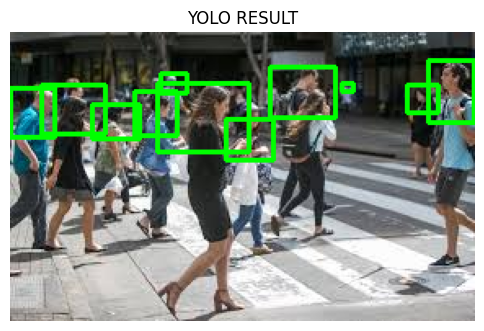

yolo_time 0.2689511775970459


In [40]:
from ultralytics import YOLO
import time

def detect_heads_yolo(image, model_path='yolov8n.pt'):
    """Detect heads using YOLOv8"""
    
    # Load model
    model = YOLO(model_path)
    
    # Run inference
    start_time = time.time()
    results = model(image, classes=[0], verbose=False)  # Class 0 = person
    # print("results[0].dir():::", dir(results[0]))
    # print("results[0].boxes:::", results[0].boxes)
    # print(hasattr(results[0], "boxes"))
    # print(results[0].__dict__) 
    inference_time = time.time() - start_time
    
    # Process results
    output_image = image.copy()
    for box in results[0].boxes:
        # print("****************box***********", box)
        print("****************box.xyxy[0]***********", box.xyxy[0])
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        head_height = int((y2 - y1) * 0.3)  # Assume head is top 30%
        
        # Draw bounding box
        cv2.rectangle(output_image, 
                     (x1, y1), 
                     (x2, y1 + head_height), 
                     (0, 255, 0), 2)  # Green box
    
    return output_image, inference_time
image = load_image("data/head2.jpeg")

# Run both detectors
yolo_result, yolo_time = detect_heads_yolo(image)    
show_image(yolo_result, "YOLO RESULT")
print("yolo_time", yolo_time)

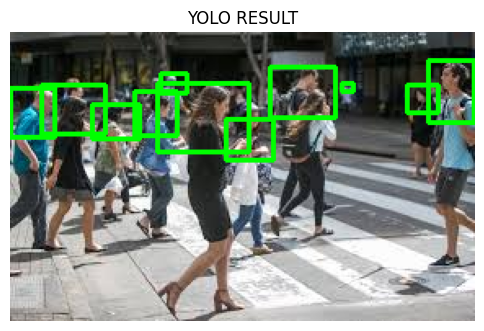

yolo_time 0.24464631080627441


In [41]:
from ultralytics import YOLO
import time

def detect_heads_yolo(image, model_path='yolov8n.pt'):
    """Detect heads using YOLOv8"""
    
    # Load model
    model = YOLO(model_path)
    
    # Run inference
    start_time = time.time()
    results = model(image, classes=[0], verbose=False)  # Class 0 = person
    inference_time = time.time() - start_time
    
    # Process results
    output_image = image.copy()
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        head_height = int((y2 - y1) * 0.3)  # Assume head is top 30%
        
        # Draw bounding box
        cv2.rectangle(output_image, 
                     (x1, y1), 
                     (x2, y1 + head_height), 
                     (0, 255, 0), 2)  # Green box
    
    return output_image, inference_time

image = load_image("data/head2.jpeg")
yolo_result, yolo_time = detect_heads_yolo(image)    
show_image(yolo_result, "YOLO RESULT")
print("yolo_time", yolo_time)

[{'boxes': tensor([[1.9868e+01, 3.1302e+01, 5.8005e+01, 1.3649e+02],
        [2.5565e+02, 2.0511e+01, 2.8500e+02, 1.4597e+02],
        [7.5050e+01, 3.6288e+01, 1.0406e+02, 1.2749e+02],
        [1.4495e-01, 3.3816e+01, 2.6961e+01, 1.3263e+02],
        [1.6394e+02, 2.9063e+01, 1.9990e+02, 1.2672e+02],
        [2.4402e+02, 3.5742e+01, 2.6036e+02, 9.1152e+01],
        [9.5848e+01, 3.4285e+01, 1.5422e+02, 1.7399e+02],
        [4.9071e+01, 4.4962e+01, 7.8675e+01, 1.1767e+02],
        [9.2553e+01, 2.5598e+01, 1.0760e+02, 5.9731e+01],
        [1.3186e+02, 5.4672e+01, 1.6036e+02, 1.3511e+02],
        [2.0275e+02, 3.1444e+01, 2.1049e+02, 5.0727e+01],
        [1.5512e+02, 3.1479e+01, 1.6485e+02, 5.7921e+01],
        [3.0493e+01, 2.7216e+01, 4.6451e+01, 4.6041e+01],
        [1.0656e+02, 3.1733e+01, 1.3896e+02, 1.3587e+02],
        [1.6850e+02, 2.1423e+01, 1.9362e+02, 6.4536e+01],
        [1.6842e+02, 5.3623e+01, 1.8979e+02, 8.1397e+01],
        [1.3701e+02, 4.1726e+01, 1.5382e+02, 6.3804e+01],
   

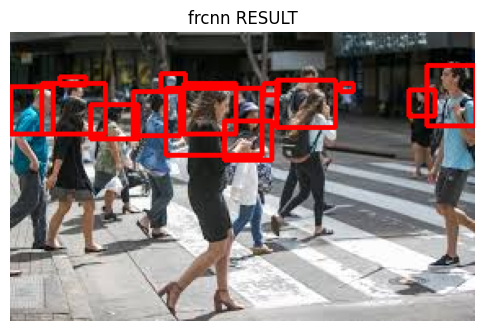

frcnn_time  3.9593565464019775


In [48]:
import torch
import torchvision
from torchvision.transforms import functional as F

def detect_heads_frcnn(image):
    """Detect heads using Faster R-CNN"""
    
    # Load model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    
    # Preprocess image
    image_tensor = F.to_tensor(image).unsqueeze(0)
    
    # Run inference
    start_time = time.time()
    with torch.no_grad():
        output1 = model(image_tensor)
        print(output1)
        outputs = model(image_tensor)[0]
        print(outputs)
    inference_time = time.time() - start_time
    
    # Process results
    output_image = image.copy()
    for box, score, label in zip(outputs['boxes'], outputs['scores'], outputs['labels']):
        if score > 0.8 and label == 1:  # Person class with high confidence
            x1, y1, x2, y2 = map(int, box)
            head_height = int((y2 - y1) * 0.3)
            
            # Draw bounding box
            cv2.rectangle(output_image, 
                         (x1, y1), 
                         (x2, y1 + head_height), 
                         (255, 0, 0), 2)  # Red box
    
    return output_image, inference_time

image = load_image("data/head2.jpeg")
frcnn_result, frcnn_time = detect_heads_frcnn(image)    
show_image(frcnn_result, "frcnn RESULT")
print("frcnn_time ", frcnn_time )

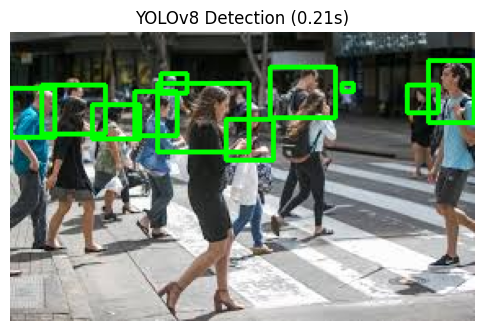

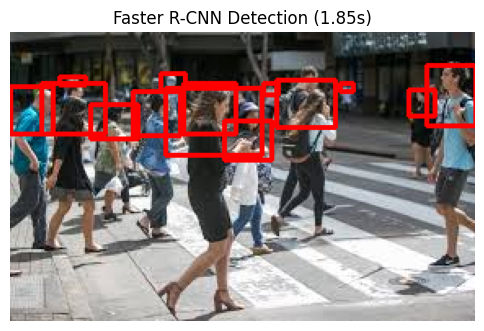

In [43]:
# Load image
image = load_image("data/head2.jpeg")

# Run both detectors
yolo_result, yolo_time = detect_heads_yolo(image)
frcnn_result, frcnn_time = detect_heads_frcnn(image)

# Display results
show_image(yolo_result, f"YOLOv8 Detection ({yolo_time:.2f}s)")
show_image(frcnn_result, f"Faster R-CNN Detection ({frcnn_time:.2f}s)")

In [44]:
print(f"\n{' Model ':-^30}")
print(f"{'YOLOv8':<15} {yolo_time:.4f} seconds")
print(f"{'Faster R-CNN':<15} {frcnn_time:.4f} seconds")
print(f"\nYOLOv8 is {frcnn_time/yolo_time:.1f}x faster")


----------- Model ------------
YOLOv8          0.2051 seconds
Faster R-CNN    1.8462 seconds

YOLOv8 is 9.0x faster
